#             CRIME AGAINST WOMEN IN INDIA

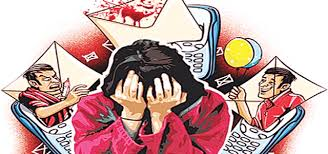

#### Violence against women in Indian is going side by side to the technological improvement in modern world in the country. Violence to the women is of various types and can happen at any place like home, public place or office. It is the big issue related to the women which cannot be ignored as it is hindering almost one half growth of the country.

### This project elaborate the data record of all types of crime against women in India in the duration of year 2001 - 2014

### Main aim on working on this project is to reflect the current situation of women in Indian Society and raise concern about this matter

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the Data

In [78]:
# Reading the csv file
crime_df = pd.read_csv("crimes_against_women.csv")
crime_df.head()



,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


### Number of rows and columns of our dataset

In [79]:
crime_df.shape 

(10677, 11)

## Data Preparation and cleaning

* Let us see if any of the columns have null value

In [80]:
Null_crime = crime_df.isna().sum()
Null_crime

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

* Hence none of the column has any null value.

### Let us find out unique states and districts where crimes have been commited

In [81]:
districts = len(crime_df.DISTRICT.unique())
districts

1605

* There are total 718 districts in India but the data shows 1605 districts.Hence there is messy or falsy values in huge amount, in this case it is better to drop the 'DISTRICTS' column. We will also drop 'Unanamed:0' as it is of no use in our data analysis

In [82]:
crime_df.drop(['DISTRICT','Unnamed: 0'], axis = 1, inplace = True)

In [83]:
# let us rename the column
crime_df.rename( columns = {'Kidnapping and Abduction':'Kidnapping_Abduction',
                            'Dowry Deaths':'Dowry_Deaths',
                            'Assault on women with intent to outrage her modesty':'Hurting_of_womens_modesty',
                            'Insult to modesty of Women':'Insult_to_womens_modesty',
                            'Cruelty by Husband or his Relatives':'Domestic_Cruelty',
                            'Importation of Girls':'Importation_of_Girls'},
                             inplace = True)

In [84]:
# Let's have a look on our data
crime_df

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


In [85]:
# finding name of all unique states and UT
print(crime_df['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry' 'Telangana'
 'A & N Islands']


In [86]:
len(crime_df['STATE/UT'].unique())

72

* We can see from above that there are lot many repeated datas, like some of them are repeated again by using capital letters and some of them have issues with space too, like A&N Islands and also Delhi has been repeated again by mentioning it as Delhi UT

In [87]:
# First we will remove all the repeated uppercase values
def remove_spaces_uppercase(r):
    r = r['STATE/UT'].strip()
    r = r.upper()
    return r
crime_df['STATE/UT'] = crime_df.apply(remove_spaces_uppercase, axis=1)

# replace function to replace the other type of repeated datas as dicussed above
crime_df['STATE/UT'].replace("A&N ISLANDS", "A & N ISLANDS", inplace = True)
crime_df['STATE/UT'].replace("D&N HAVELI", "D & N HAVELI", inplace = True)
crime_df['STATE/UT'].replace("DELHI UT", "DELHI", inplace = True)


In [88]:
len(crime_df["STATE/UT"].unique())



36

* The total number of States and UT is coming out to be perfect. Hence we are done with our Data cleaning process

## Exploratory Analysis and Visualisation

In [89]:
crime_df

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,LAKSHADWEEP,2014,1,0,0,1,2,0,0
10673,LAKSHADWEEP,2014,1,0,0,1,2,0,0
10674,PUDUCHERRY,2014,3,1,0,12,1,1,0
10675,PUDUCHERRY,2014,7,6,1,20,7,3,0


* let us find the total population of women who has been a victim of crime

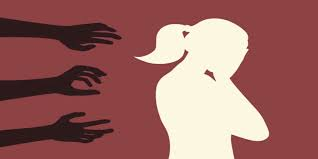

In [90]:
victims_raped = crime_df.Rape.sum()
victims_kidnapped_abducted = crime_df.Kidnapping_Abduction.sum()
dowry_death = crime_df.Dowry_Deaths.sum()
modesty_assault = crime_df.Hurting_of_womens_modesty.sum()
insult_to_modesty = crime_df.Insult_to_womens_modesty.sum()
domestic_violence = crime_df.Domestic_Cruelty.sum()
girls_imported = crime_df.Importation_of_Girls.sum()

In [91]:
total_population_of_victim = victims_raped + victims_kidnapped_abducted + dowry_death + modesty_assault + insult_to_modesty + domestic_violence + girls_imported
total_population_of_victim

5321610

* The above analysis portrays the situation of women in our society. More tha 5 million women have been a victim

* Lets us analyse each of the crime separately using graphs
(for our ease we exclude 'Insult_to _modesty_of women' column)


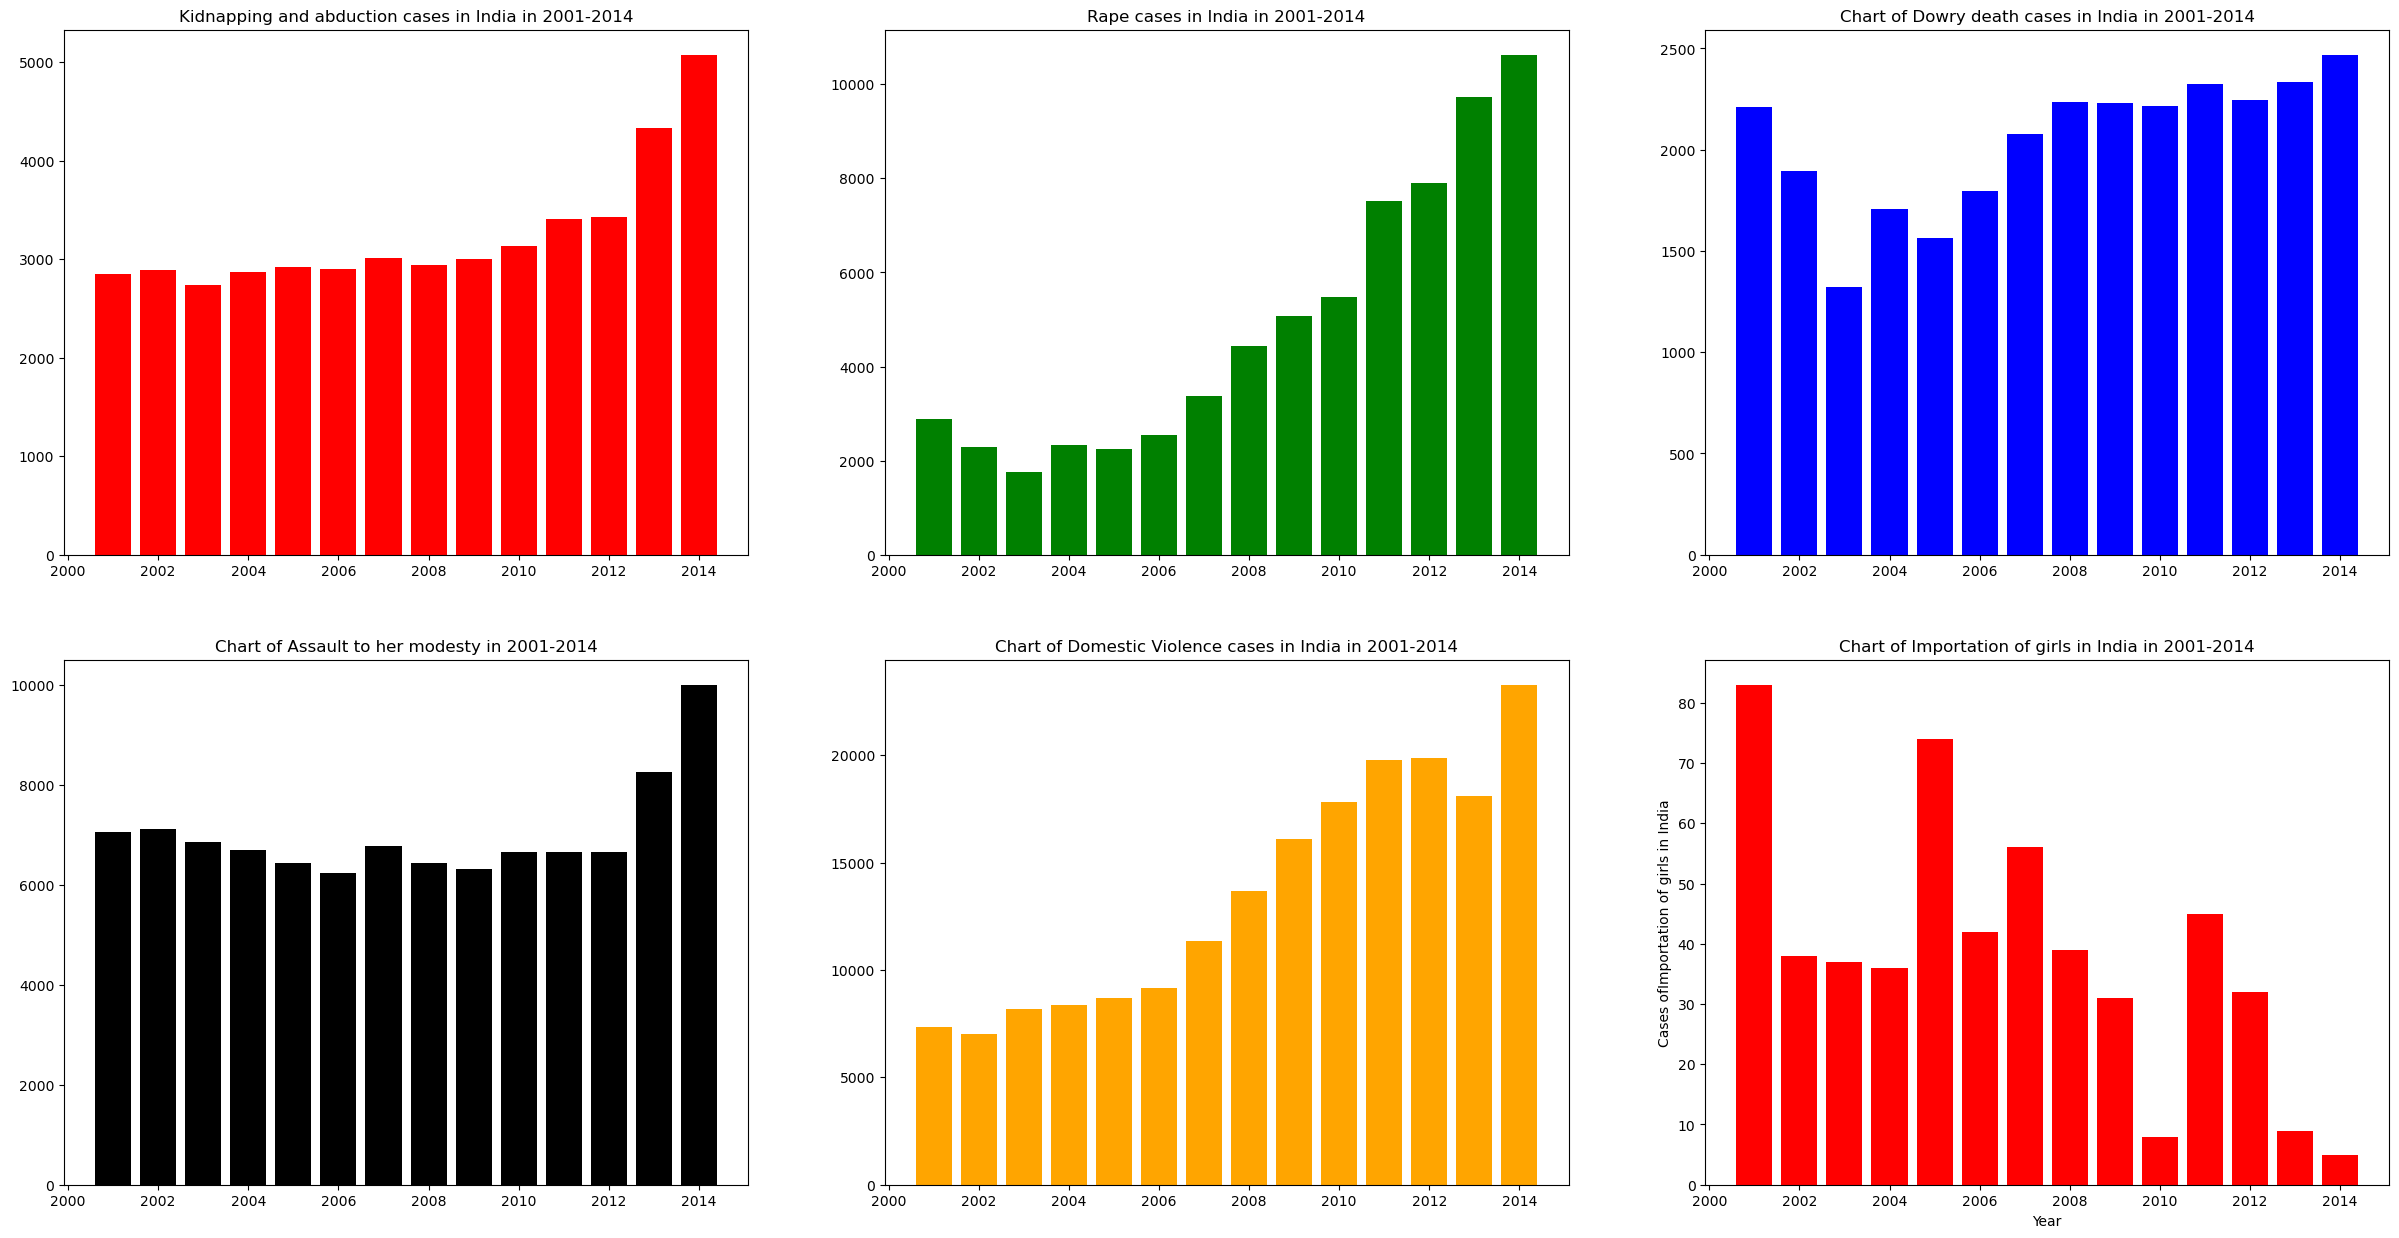

In [92]:
fig, axes = plt.subplots(2,3, figsize=(30,15))

axes[0,0].set_title("Kidnapping and abduction cases in India in 2001-2014")
axes[0,0].bar(crime_df.Year,crime_df.Rape, color='Red');
plt.xlabel('Year') 
plt.ylabel('Rape Cases in India')

axes[0,1].set_title("Rape cases in India in 2001-2014")
axes[0,1].bar(crime_df.Year,crime_df.Kidnapping_Abduction, color='Green');
plt.xlabel('Year') 
plt.ylabel('Kidnapping and abduction Cases in India')

axes[0,2].set_title("Chart of Dowry death cases in India in 2001-2014")
axes[0,2].bar(crime_df.Year,crime_df.Dowry_Deaths, color='Blue');
plt.xlabel('Year') 
plt.ylabel('  Dowry death cases in India')

axes[1,0].set_title("Chart of Assault to her modesty in 2001-2014")
axes[1,0].bar(crime_df.Year,crime_df.Hurting_of_womens_modesty, color='Black');
plt.xlabel('Year') 
plt.ylabel(' Cases of hurting women\'s modesty in India')

axes[1,1].set_title("Chart of Domestic Violence cases in India in 2001-2014")
axes[1,1].bar(crime_df.Year, crime_df.Domestic_Cruelty, color = 'orange');
plt.xlabel('Year') 
plt.ylabel('Cases of Domestic Violence in India') 

axes[1,2].set_title("Chart of Importation of girls in India in 2001-2014")
axes[1,2].bar(crime_df.Year, crime_df.Importation_of_Girls, color = 'red');
plt.xlabel('Year') 
plt.ylabel('Cases ofImportation of girls in India') 

plt.show()


### From the above graphs we can conclude the following things:

* The crime cases has been increasing with the years except cases of importation of girls.

* The year 2014 has been the year where the violence against the women was reported to be maximum, under the cases of rape,assault,domestic violence etc, which can be proved from the above graph 

In [93]:
# let us cross examined with code
count_df = crime_df.groupby('Year')[['STATE/UT']].count()
count_df

,STATE/UT
Year,
2001,716
2002,719
2003,728
2004,729
2005,733
2006,740
2007,743
2008,761
2009,767


### Let us use seaborn to take help of heatmap to represent cases generated more frequently with each passing year

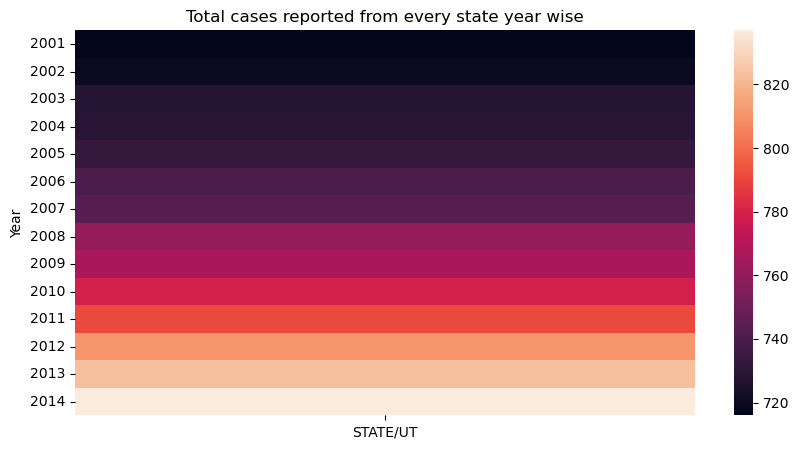

In [94]:
plt.figure(figsize=(10,5))
plt.title("Total cases reported from every state year wise")
sns.heatmap(count_df);

### Sadly the crime increased with each passing year

## As a part of this Data Analysis, it is very important to raise the questions and find answers to them

### By the looking at the above six graphs we can see the major crimes commited are Rape,Kidnapping and abduction,Dowry deaths and domestic cruelty.

* Hence we will analyse these four

### Ten highest reported rape cases in India, in the span of 2001-2014

In [95]:
max_rape_cases = crime_df.sort_values('Rape',ascending = False).head(10)
max_rape_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
10244,MADHYA PRADESH,2014,5076,5688,733,9609,429,6451,0
9426,MADHYA PRADESH,2013,4335,2873,776,8252,736,4988,7
10445,RAJASTHAN,2014,3759,4421,408,5999,18,15905,0
10595,UTTAR PRADESH,2014,3467,10626,2469,8605,29,10471,0
10291,MAHARASHTRA,2014,3438,2457,279,10001,1575,7696,1
8611,MADHYA PRADESH,2012,3425,1127,743,6655,774,3988,6
7810,MADHYA PRADESH,2011,3406,1088,811,6665,762,3732,45
9628,RAJASTHAN,2013,3285,4047,453,4829,25,15094,1
7025,MADHYA PRADESH,2010,3135,1030,892,6646,918,3756,5
9472,MAHARASHTRA,2013,3063,1874,320,8132,2632,8542,0


#### In 2014, Madhya Pradesh reported the maximum rape cases

### Ten highest reported Domestic violence cases in India

In [96]:
max_domestic_violance_cases = crime_df.sort_values('Domestic_Cruelty', ascending = False).head(10)
max_domestic_violance_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
10640,WEST BENGAL,2014,1466,4976,501,5670,543,23278,4
8982,WEST BENGAL,2012,2046,4168,593,3345,556,19865,12
8172,WEST BENGAL,2011,2363,3711,510,2363,200,19772,0
9804,WEST BENGAL,2013,1685,3830,481,4913,577,18116,9
7381,WEST BENGAL,2010,2311,2764,507,2465,163,17796,8
6602,WEST BENGAL,2009,2336,2187,506,1942,108,16112,5
10445,RAJASTHAN,2014,3759,4421,408,5999,18,15905,0
9628,RAJASTHAN,2013,3285,4047,453,4829,25,15094,1
9050,ANDHRA PRADESH,2013,1635,1595,492,6930,4702,15084,0
5835,WEST BENGAL,2008,2263,1907,451,2396,94,13663,5


####  maximum cases of Domestic Violence came from West Bengal in the year 2014, with number of cases reported being 23278.

### 10 highest reported Dowry death cases in India, in the span of year 2001-2014.

In [97]:
max_dowry_death_case = crime_df.sort_values('Dowry_Deaths', ascending = False).head(10)
max_dowry_death_case

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
10595,UTTAR PRADESH,2014,3467,10626,2469,8605,29,10471,0
9760,UTTAR PRADESH,2013,3050,9737,2335,7303,25,8781,0
8132,UTTAR PRADESH,2011,2042,7525,2322,3455,3,7121,0
8938,UTTAR PRADESH,2012,1963,7910,2244,3247,8,7661,0
5796,UTTAR PRADESH,2008,1871,4439,2237,2955,3374,8312,0
6563,UTTAR PRADESH,2009,1759,5078,2232,2782,2524,8566,0
7342,UTTAR PRADESH,2010,1563,5468,2217,2793,11,7978,0
650,UTTAR PRADESH,2001,1958,2879,2211,2870,2575,7365,0
5040,UTTAR PRADESH,2007,1648,3363,2076,2522,2882,7650,0
1366,UTTAR PRADESH,2002,1415,2298,1893,2145,1887,5679,0


#### According to our analysis, maximum Dowry death has been reported in Uttar Pradesh in the year 2014

### Finding total number of cases, in span of 2001-2014 under each category, state wise.

In [98]:
counts_df = crime_df.groupby('STATE/UT')[['Rape', 'Kidnapping_Abduction', 'Dowry_Deaths','Domestic_Cruelty']].sum()
counts_df

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty
STATE/UT,,,,
A & N ISLANDS,336,212,20,288
ANDHRA PRADESH,32150,34504,13844,280906
ARUNACHAL PRADESH,1316,1470,6,476
ASSAM,40190,62074,3268,115300
BIHAR,30758,57086,32206,69770
CHANDIGARH,770,1682,90,2080
CHHATTISGARH,29308,11808,2758,23436
D & N HAVELI,132,224,2,90
DAMAN & DIU,60,44,6,76


### Finding out the top 5 states, where maximum numbers of cases has been reported in TOTAl in span of 2001-2014,each category wise

* For Rape cases

In [99]:
counts_df.sort_values(by = 'Rape', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty
STATE/UT,,,,
MADHYA PRADESH,90996,35608,21090,102816
UTTAR PRADESH,51150,135906,57256,193738
MAHARASHTRA,48974,30368,9696,193202
WEST BENGAL,47876,61158,12308,344124
RAJASTHAN,45684,66278,11854,262200


#### Madhya Pradesh has reported the highest number of rape cases in TOTAL in span of 2001-2014, where UP, Maharastra, West Bengal and Rajasthan follows the list.

* For Kidnapping and abduction case -

In [100]:
counts_df.sort_values(by = 'Kidnapping_Abduction', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty
STATE/UT,,,,
UTTAR PRADESH,51150,135906,57256,193738
RAJASTHAN,45684,66278,11854,262200
ASSAM,40190,62074,3268,115300
WEST BENGAL,47876,61158,12308,344124
BIHAR,30758,57086,32206,69770


#### Uttar Pradesh has reported the highest number of cases under "Kidnapping and Abduction" in TOTAL in span of 2001-2014, where Rajasthan, Assam, West Bengal and Bihar follows the list.

* Dowry deaths

In [101]:
counts_df.sort_values(by = 'Dowry_Deaths', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty
STATE/UT,,,,
UTTAR PRADESH,51150,135906,57256,193738
BIHAR,30758,57086,32206,69770
MADHYA PRADESH,90996,35608,21090,102816
ANDHRA PRADESH,32150,34504,13844,280906
WEST BENGAL,47876,61158,12308,344124


#### Uttar Pradesh has reported the highest number of Deaths caused by Dowry cases in TOTAL in span of 2001-2014, where Bihar, Madhya Pradesh, Andhra Pradesh and West Bengal follows the list.

* Domestic violence cases

In [102]:
counts_df.sort_values(by = 'Domestic_Cruelty', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty
STATE/UT,,,,
WEST BENGAL,47876,61158,12308,344124
ANDHRA PRADESH,32150,34504,13844,280906
RAJASTHAN,45684,66278,11854,262200
UTTAR PRADESH,51150,135906,57256,193738
MAHARASHTRA,48974,30368,9696,193202


#### West Bengal has reported the highest number of cases of Domestic Violence in TOTAL in span of 2001-2014, where Andhra Pradesh, Rajsthan, Uttar Pradesh and Maharashtra follows the list.

### Uttar Pradesh has reported the maximum cases from both the kidnapping and abduction as well as Dowry deaths.

In [103]:
counts_df["Total_crimes"] = counts_df.apply(lambda row: row.Rape+row.Kidnapping_Abduction+row.Dowry_Deaths+row.Domestic_Cruelty,axis=1)


In [104]:
counts_df.sort_values(by = 'Total_crimes', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Total_crimes
STATE/UT,,,,,
WEST BENGAL,47876,61158,12308,344124,465466
UTTAR PRADESH,51150,135906,57256,193738,438050
RAJASTHAN,45684,66278,11854,262200,386016
ANDHRA PRADESH,32150,34504,13844,280906,361404
MAHARASHTRA,48974,30368,9696,193202,282240


### Hence from the above analysis we can see the maximum crimes have been occured in West Bengal in span 2001-2014,where Uttar Pradesh, Rajasthan, Andhra Pradesh, Maharshtra follows the list.


## Inferences and Conclusion

In [ ]:
#### The main aim of the project was to analyse the situation of women in the year 2001-2014. 
#### We also did a deep analysis through charts and by raising important questions. 
          1)More than 5 million females has been a victim of some or other type of Violance, based on their gender, 
          starting from rape to importing them for buisness. 
          2) We concluded from the series of bar graphs that 2014 was the year, when crimes were reported the highest 
          under each category.
          3) We tried finding out the top 10 highest cases reported ever, along with year in which has been reported 
          and in which state.Where, Madhya Pradesh having highest number of cases of rape in 2014, Uttar Pradesh having 
          highest cases in Dowry death in 2014, West Bengal having highest cases in Domestic Violence in 2014. 
          4)We summarised the TOTAL number of cases happening, in 2001-2014, by each state.
          5)We also found out the top 5 states where maximum number of TOTAL cases has been reported from 2001-2014, 
          state   wise.
          